In [1]:
import numpy as np
import pandas
from matplotlib import pyplot as plt
from typing import List, Tuple, Dict

# lets assume this code requires Python 3.6+ to run.


# TASK 1

In [2]:
def transpose(M: np.array) -> np.array:
    return np.array(
        [[M[i, j] for i in range(M.shape[0])] for j in range(M.shape[1])]
    )

In [3]:
# 1
A = np.linspace(1, 20, 10)
# 2
B = np.linspace(0, 1, 10)
# 3
AB = A * B
print(AB)
# 4
c = 2
Ac = A * c
print(Ac)
# 5
m4x4 = np.matrix(np.random.randint(1, 101, (4, 4)))
# Nie, macierze są tylko dwuwymiarowe, ndarray może być n-wymiarowa
print(m4x4)
# 6
print(np.array([m4x4[i, i] for i in range(4)]))
# 7

print("m4x4:", m4x4, sep="\n")
print("m4x4_T:", transpose(m4x4), sep="\n")


[ 0.          0.34567901  1.16049383  2.44444444  4.19753086  6.41975309
  9.11111111 12.27160494 15.90123457 20.        ]
[ 2.          6.22222222 10.44444444 14.66666667 18.88888889 23.11111111
 27.33333333 31.55555556 35.77777778 40.        ]
[[34 82 65 85]
 [18 92 99 12]
 [66 71 93 49]
 [68 36 87 54]]
[34 92 93 54]
m4x4:
[[34 82 65 85]
 [18 92 99 12]
 [66 71 93 49]
 [68 36 87 54]]
m4x4_T:
[[34 18 66 68]
 [82 92 71 36]
 [65 99 93 87]
 [85 12 49 54]]


# TASK 2

In [4]:
data = pandas.read_excel("dane_2020-2021.xlsx")
column_tag_list = [f"X{i}" for i in range(1, 11)]

/home/argmaster/Documents/dev/2022/sem2/tedw/.env/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
def bucketize(
    data: List[float], round_to: int = 2, explicit_bucket_count: int = None
) -> Tuple[List[str], List[float]]:
    """Classifies given data into len(data) // 4 + 1 categories,
    returns list of category range labels and list of list of values in
    categories.
    """
    max_val = max(data) * 1.1
    min_val = min(data) * 0.9
    if explicit_bucket_count is None:
        bucket_count: int = len(data) // 4
    else:
        bucket_count = explicit_bucket_count
    span: float = abs(max_val - min_val)
    bucket_size: float = span / bucket_count
    buckets: Dict[Tuple[float, float], List[float]] = {}

    for i in range(bucket_count):
        bucket_min = round(min_val + i * bucket_size, round_to)
        bucket_max = round(min_val + (i + 1) * bucket_size, round_to)
        buckets[bucket_min, bucket_max] = []
    else:
        last_bucket = buckets[bucket_min, bucket_max]

    for value in data:
        # small faux-pass here: order is not guaranteed on every runtime environment
        # however with CPython 3.6+ dictionary impl keeps order of insertions.
        # MAY be a problem with Jython or PyPy or older CPython versions
        # Btw see https://www.hyrumslaw.com/
        for (bucket_min, bucket_max), bucket in buckets.items():
            if bucket_min <= value <= bucket_max:
                bucket.append(value)
                break
        else:
            last_bucket.append(value)

    return list(buckets.keys()), list(buckets.values())


-------------------
Column X1
rozstęp: 0.30332744587166366
środek: 0.30332744587166366
średnia: 0.30332744587166366
mediana: 0.30332744587166366
odchylenie: 0.30332744587166366
indeks skośności rozkładu: -0.9953601197167469
-------------------
Q1 : True
Q2 : True
Q3 : False
Q4 : True
-------------------
Column X2
rozstęp: 1.5395498450328402
środek: 1.5395498450328402
średnia: 1.5395498450328402
mediana: 1.5395498450328402
odchylenie: 1.5395498450328402
indeks skośności rozkładu: 0.5862082097333485
-------------------
Q1 : True
Q2 : True
Q3 : True
Q4 : True
-------------------
Column X3
rozstęp: 0.14325399203358363
środek: 0.14325399203358363
średnia: 0.14325399203358363
mediana: 0.14325399203358363
odchylenie: 0.14325399203358363
indeks skośności rozkładu: -0.06884844460474113
-------------------
Q1 : True
Q2 : True
Q3 : True
Q4 : True
-------------------
Column X4
rozstęp: 1.303554443853419
środek: 1.303554443853419
średnia: 1.303554443853419
mediana: 1.303554443853419
odchylenie: 1.3

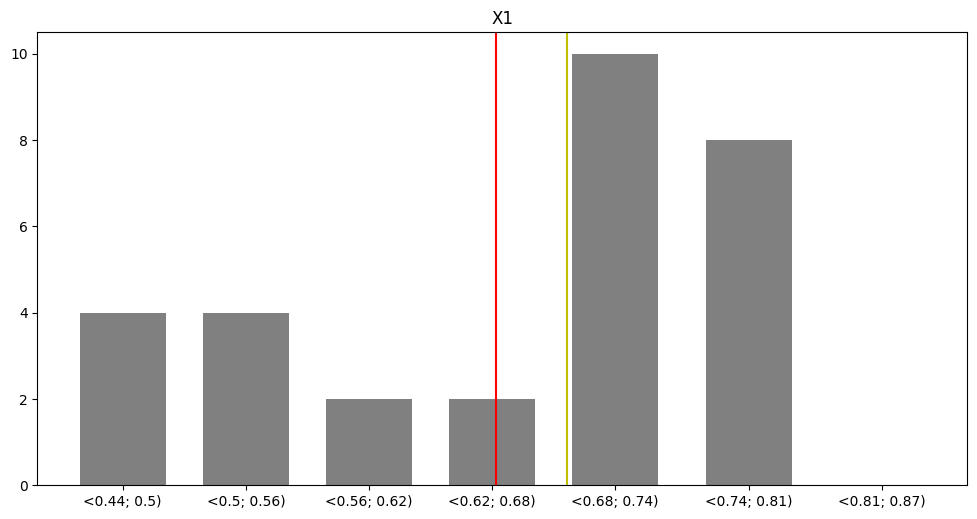

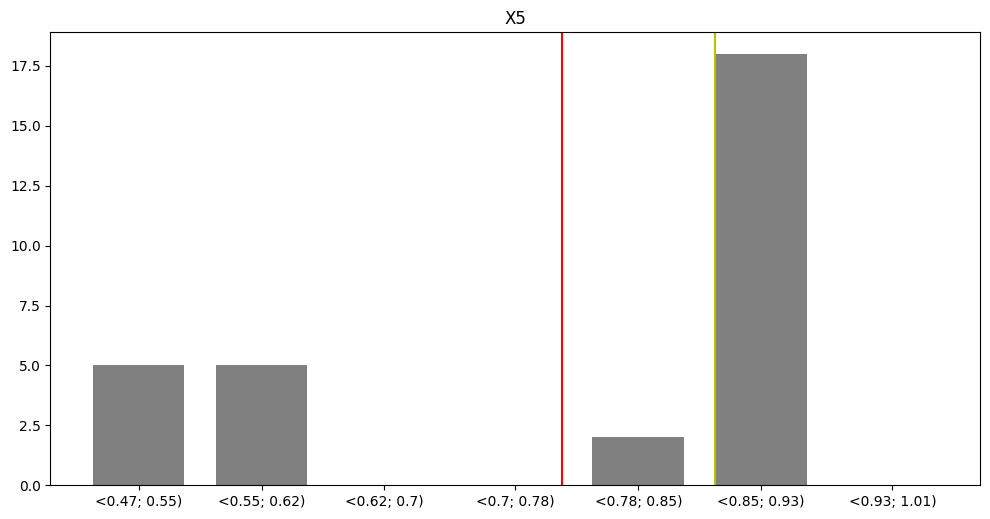

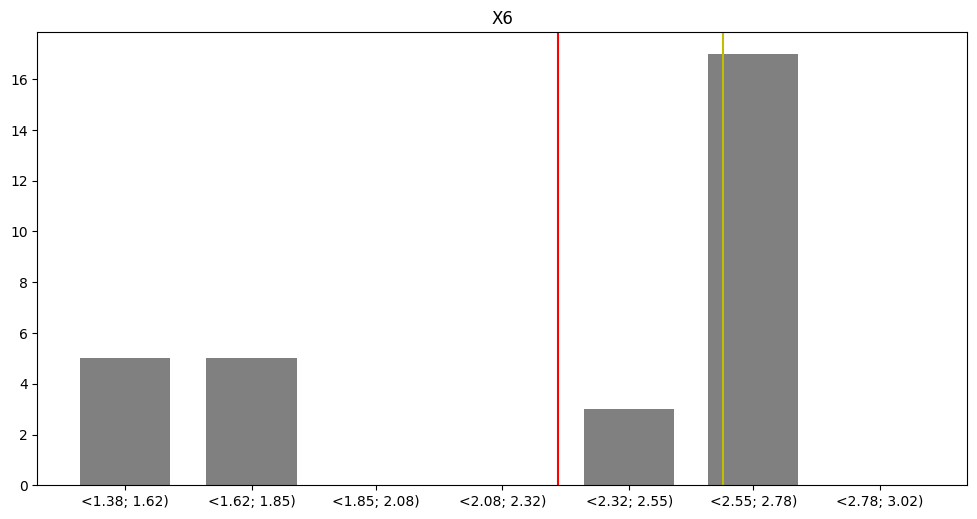

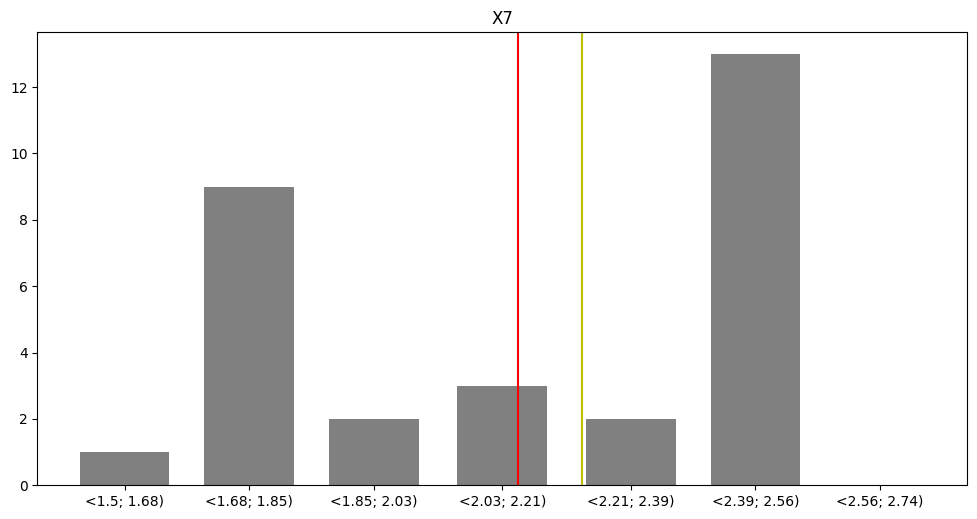

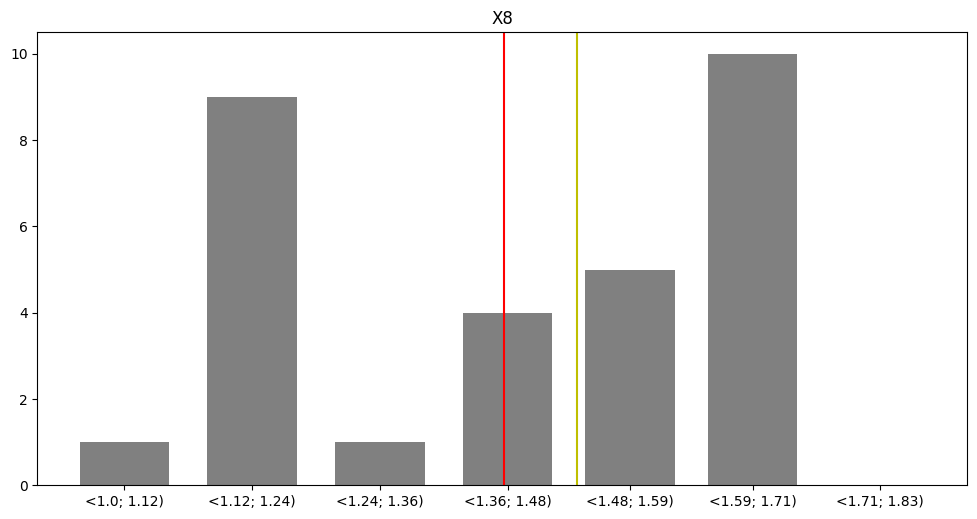

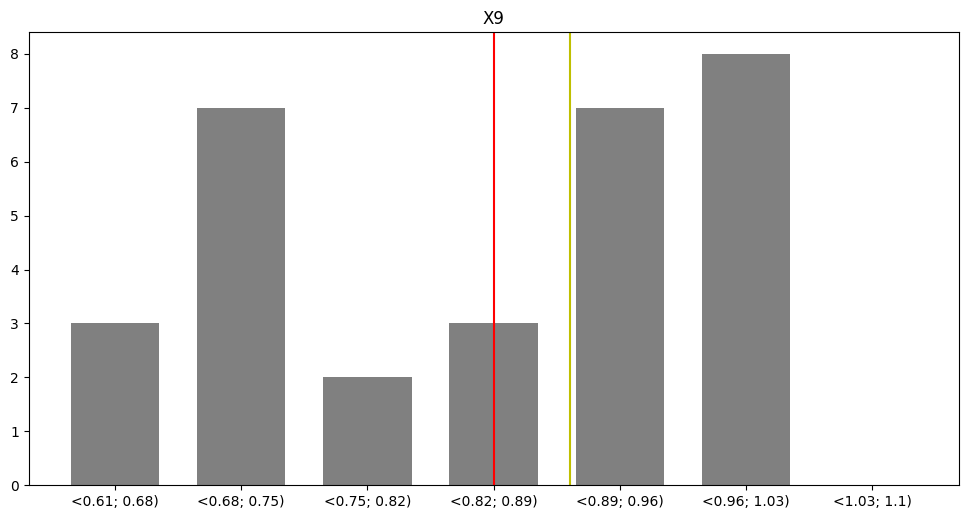

In [6]:
for column_tag in column_tag_list:
    print("-------------------")
    print(f"Column {column_tag}")
    column = data[column_tag]
    # rozstęp
    r = column.max() - column.min()
    print(f"rozstęp: {r}")
    d = (column.max() + column.min()) / 2
    print(f"środek: {r}")
    m = column.mean()
    print(f"średnia: {r}")
    w = column.median()
    print(f"mediana: {r}")
    n = len(column)
    s = np.sqrt(sum((column[i] - m) ** 2 for i in range(n)) / n)
    print(f"odchylenie: {r}")
    q = 3 * ((m - w) / s)
    print(f"indeks skośności rozkładu: {q}")
    print("-------------------")

    q1 = (column.min() / column.max()) > 0.1
    q2 = abs(d - m) < s
    q3 = 3 <= (r / s) <= 5
    q4 = abs(q) < 2
    print("Q1 :", q1)
    print("Q2 :", q2)
    print("Q3 :", q3)
    print("Q4 :", q4)
    if q1 and q2 and q3 and q4:
        continue

    labels, values = bucketize(column)
    bar_width = (labels[0][1] - labels[0][0]) * 0.7
    center_labels = [sum(l) / 2 for l in labels]

    plt.figure(figsize=(12, 6), dpi=100)
    plt.bar(
        center_labels,
        height=[len(v) for v in values],
        width=bar_width,
        color="gray",
    )
    plt.axvline(m, c="r")
    plt.axvline(w, c="y")
    plt.xticks(
        center_labels,
        [f"<{round(l[0], 3)}; {round(l[1], 3)})" for l in labels],
    )
    plt.title(column_tag)
